/* Copyright (C) 2019 Advenio Tecnosys Pvt. Ltd.

All Rights Reserved

*

NOTICE:

All information contained herein is, and remains

the property of Advenio Tecnosys and its suppliers,

if any. The intellectual and technical concepts contained

herein are proprietary to Advenio Tecnosys

and its suppliers and may be covered by Indian, U.S. and Foreign Patents,

patents in process, and are protected by trade secret or copyright law.

Appropriation, redistribution, dissemination of this information or reproduction

of this material is strictly forbidden unless prior written permission is obtained

from Advenio Tecnosys Pvt. Ltd.

*

Author: Vaibhav Sharma

*/

'''


In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd
from fastai.metrics import *
import pretrainedmodels
from fastai.vision.learner import model_meta
from fastai.callbacks import EarlyStoppingCallback,SaveModelCallback,TerminateOnNaNCallback,OverSamplingCallback,CSVLogger
from torchvision.models import *
import pretrainedmodels
import fastai
from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
from ipyexperiments import *
from utils import *
import sys
import fastai.vision.models as Mods

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
def roc_auc(labels,predictions):
    from sklearn.metrics import roc_curve, auc
    # probs from log preds
    #probs = np.exp(preds[:,1])
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(data['labels'], data['predictions'],pos_label=1)
    #print(tpr)
    # Compute ROC area
    roc_auc = auc(fpr, tpr)
    print('ROC area is {0}'.format(roc_auc))
    #print(np.argmax(tpr-fpr))
    #print(thresholds[np.argmax(tpr-fpr)])
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

In [4]:
precision=Precision()
recall=Recall()
matthews=MatthewsCorreff()
roc_auc_score=AUROC()

In [5]:
#path='/media/advenio/New Volume3/new_data/cascaded/normal-subtle'
path = '/home/harsh/amk/rotated/cascade/subtle-normal'

In [6]:
image_size=128
batchsize=20
tfms=get_transforms(flip_vert=False,max_zoom=0.0,max_warp=0.2,p_affine=0)
data=(ImageList.from_folder(path,ignore_empty=True)
      .split_by_folder(train='train',valid='val')
      .label_from_folder()
      .transform(size=image_size)).databunch(bs = batchsize).normalize(imagenet_stats)

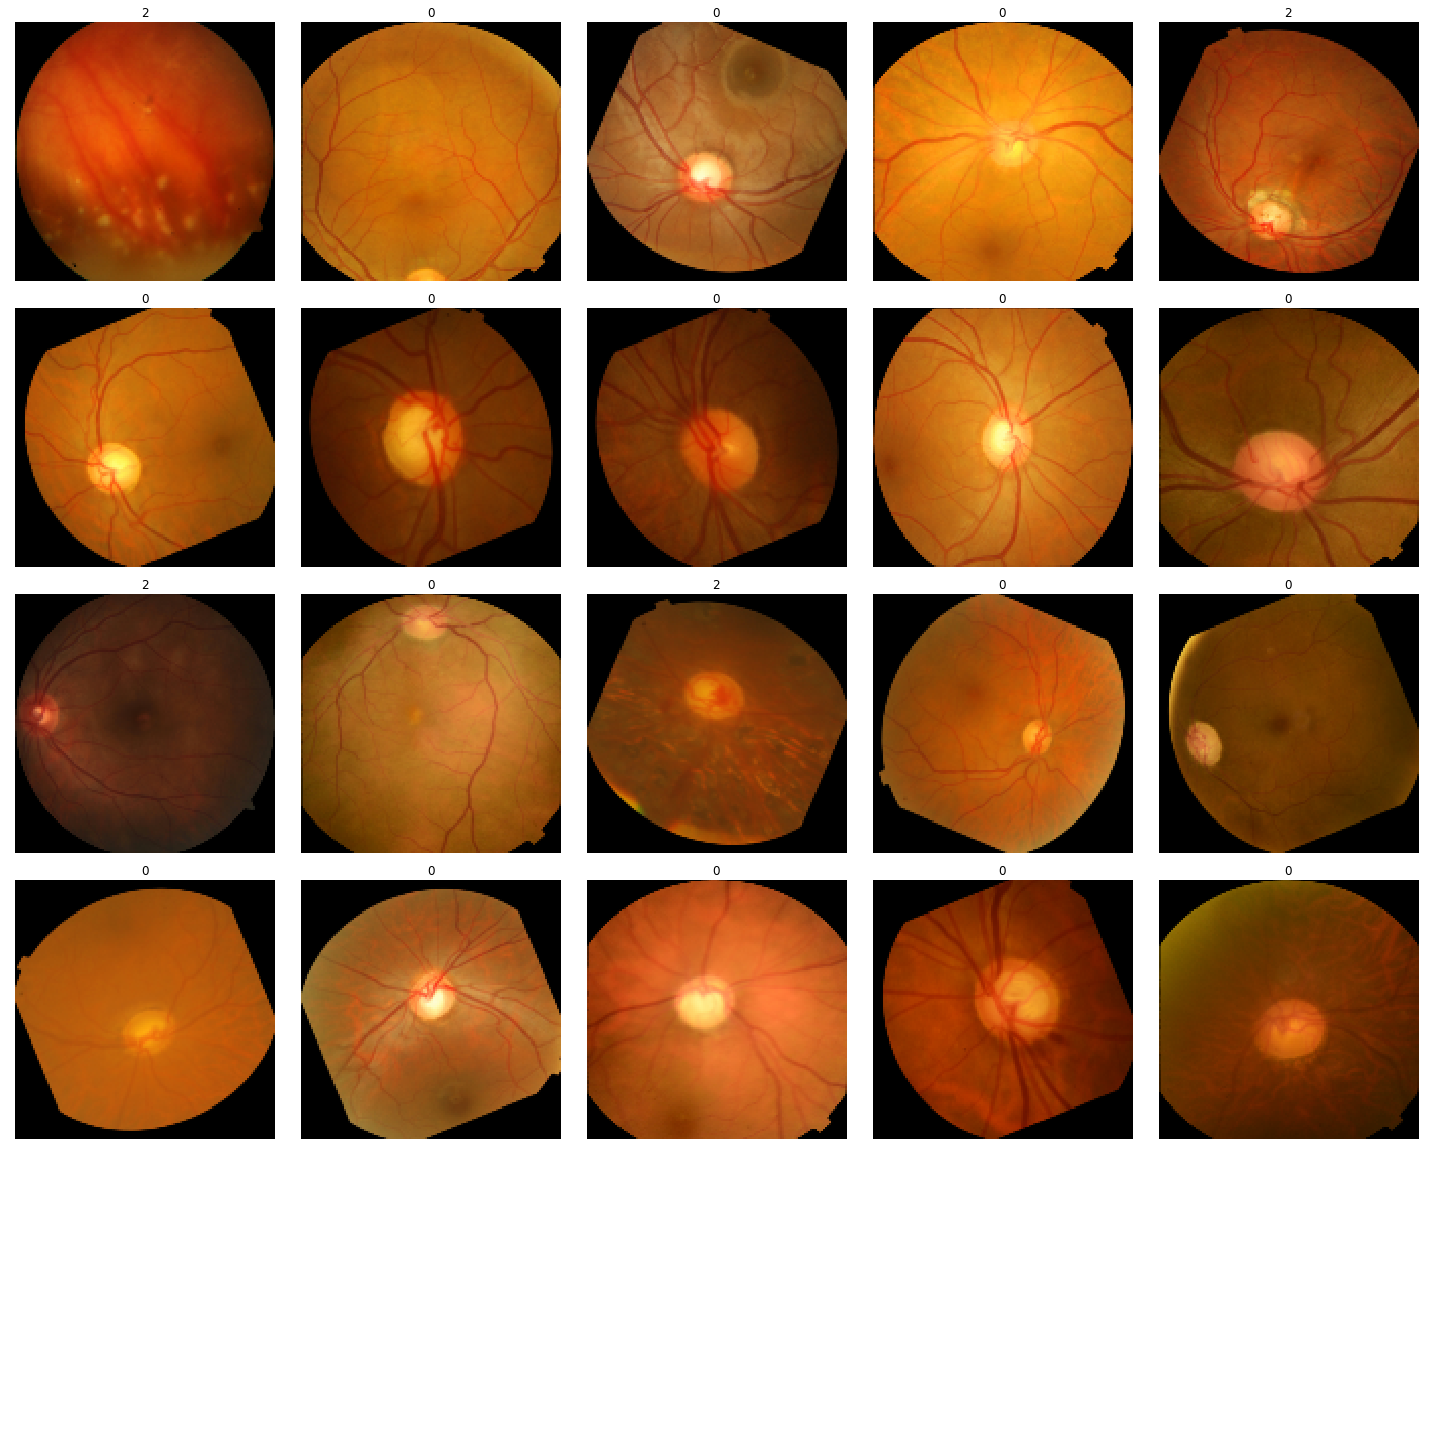

In [7]:
data.show_batch()

In [8]:
learn=cnn_learner(data,models.resnet50,metrics=[accuracy,precision,recall,matthews],pretrained=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-04
Min loss divided by 10: 5.25E-04


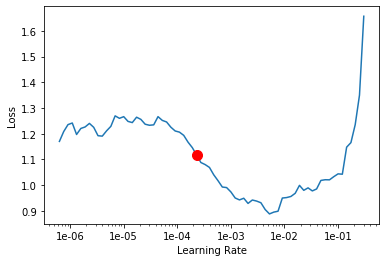

In [9]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [10]:
learn.fit_one_cycle(15,slice(1.10E-04),callbacks=[OverSamplingCallback(learn),TerminateOnNaNCallback()])


epoch,train_loss,valid_loss,accuracy,precision,recall,matthews_correff,time
0,0.494336,0.342083,0.872702,0.794275,0.864374,0.728782,02:35
1,0.371700,0.305806,0.892693,0.832714,0.872161,0.768398,01:23
2,0.303894,0.284982,0.903722,0.855964,0.875406,0.790716,01:23
3,0.266603,0.257683,0.910616,0.875979,0.870863,0.804341,01:23
4,0.235184,0.239818,0.914292,0.870558,0.890331,0.813709,01:23
5,0.206120,0.211868,0.925781,0.894942,0.895522,0.837769,01:23
6,0.205377,0.203032,0.925322,0.910256,0.875406,0.835690,01:22
7,0.157306,0.206064,0.929688,0.890082,0.914341,0.847412,01:24
8,0.175194,0.198135,0.931296,0.900129,0.906554,0.850056,01:23
9,0.151159,0.199856,0.928539,0.896263,0.902661,0.844037,01:22


In [11]:
learn.export('/home/harsh/amk/rotated/cascade/models/model2_128/export.pkl')

In [13]:
inter=learn.interpret()
/home/harsh/amk/rotated/cascade/models/model1_12/

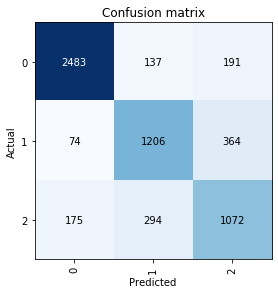

In [14]:
confusion_matrix=inter.plot_confusion_matrix()

In [ ]:
# '''For 2 classes only'''
# TPR=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
# TNR=confusion_matrix[0][0]/(confusion_matrix[0][1]+confusion_matrix[0][0]);TNR

In [ ]:
##separating true positive##

In [5]:
data={'predictions':[],
'labels':[],
'images':[]}
path='/home/harsh/amk/rotated/3-class-clahe/val'
for label in os.listdir(path):
    label_path=path+'/'+label
    for file in os.listdir(label_path):
        #print(file)
        image_path=label_path+'/'+file
        #print(image_path)
        prediction=learn.predict(open_image(image_path))
        data['predictions'].append(int(prediction[0]))
        data['labels'].append(int(label))
        data['images'].append(image_path)
        
for i in range(len(data['labels'])):
    data['labels'][i]=int(data['labels'][i])

NameError: name 'learn' is not defined

In [16]:
#writing stuff to csv
import pandas as pd
csv=pd.DataFrame(data)
csv.to_csv('FastAI_resnet50_128_experiments_rotated.csv')


In [17]:
for i in range(len(data['labels'])):
    if data['labels'][i]==2:
        data['labels'][i]=1

for i in range(len(data['labels'])):
    if data['predictions'][i]==2:
        data['predictions'][i]=1

In [ ]:
# import shutil
# fp=fn=tp=tn=count=0
# dest_path='/media/advenio/New Volume/results/abnormal-normal'
# for i in range(len(data['labels'])):
#     count+=1
#     if int(data['labels'][i])==0:
#         if data['predictions'][i]==1:
#             fp+=1
#             shutil.copy(data['images'][i],dest_path+'/FP')
#         else:
#             tn+=1
#             shutil.copy(data['images'][i],dest_path+'/TN')
#     elif data['labels'][i]==1:
#         tp+=1
#         if data['predictions'][i]==1:
#             shutil.copy(data['images'][i],dest_path+'/TP')
#         else:
#             fn+=1
#             shutil.copy(data['images'][i],dest_path+'/FN')

In [ ]:
# fp,tp,fn,tn

In [18]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
#probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(data['labels'], data['predictions'],pos_label=1)
print(tpr)
# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
#print(np.argmax(tpr-fpr))
#print(thresholds[np.argmax(tpr-fpr)])

[0.       0.921846 1.      ]
ROC area is 0.9025805602284808


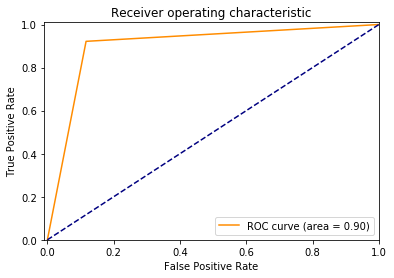

In [19]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**Cascade Inference**

In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd
from fastai.metrics import *
import pretrainedmodels
from fastai.vision.learner import model_meta
from fastai.callbacks import EarlyStoppingCallback,SaveModelCallback,TerminateOnNaNCallback,OverSamplingCallback,CSVLogger
from torchvision.models import *
import pretrainedmodels
import fastai
from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
from ipyexperiments import *
from utils import *
import sys
import fastai.vision.models as Mods

In [2]:
learn1=load_learner('/home/harsh/amk/rotated/cascade/models/model1_128')
learn2=load_learner('/home/harsh/amk/rotated/cascade/models/model2_128')

In [4]:
data={'predictions':[],
      'labels':[],
      'images':[],
      'probabilities':[]
     }
path='/home/harsh/amk/rotated/3-class-clahe/val'
for label in os.listdir(path):
    label_path=path+'/'+label
    for file in os.listdir(label_path):
        #print(file)
        image_path=label_path+'/'+file
        #print(image_path)
        prediction1=learn1.predict(open_image(image_path))
        if int(prediction1[0])==1:
            data['predictions'].append(int(prediction1[0]))
            data['probabilities'].append(list(prediction1[2].numpy()))
        else:
            prediction2=learn2.predict(open_image(image_path))
            data['predictions'].append(int(prediction2[0]))
            data['probabilities'].append(list(prediction2[2].numpy()))
            
#             if int(prediction2[0])==2:
#                    data['predictions'].append(1)
#             else:
#                    data['predictions'].append(0)
        data['images'].append(image_path)
        data['labels'].append(label)
for i in range(len(data['labels'])):
    data['labels'][i]=int(data['labels'][i])
    
    

In [6]:
import pandas as pd
csv=pd.DataFrame(data)
csv.to_csv('./resnet50-rotated_128.csv')

In [14]:
for i in range(len(data['labels'])):
    if data['labels'][i]==2:
        data['labels'][i]=1

In [10]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score,confusion_matrix
import scikitplot as skplt

In [8]:
!pip install scikit-plot

In [15]:
recall=recall_score(data['labels'],data['predictions'],average='macro')
cnf_matrix=confusion_matrix(data['labels'],data['predictions'])
sensitivity=TPR=cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
specificity=cnf_matrix[0][0]/(cnf_matrix[0][1]+cnf_matrix[0][0])
auc=roc_auc_score(data['labels'],data['predictions'])

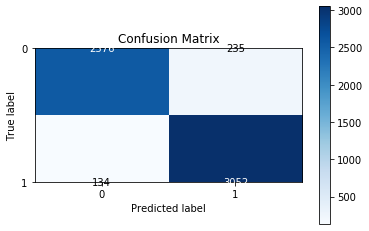

In [16]:
skplt.metrics.plot_confusion_matrix(data['labels'],data['predictions'])

In [17]:
auc,specificity,sensitivity

(0.9371704247705912, 0.9163998577018855, 0.9579409918392969)

In [22]:
#writing stuff to csv
import pandas as pd
csv=pd.DataFrame(data)

In [23]:
csv.to_csv('./cascade-rotated_Resnet50_128_fastai.csv')

In [ ]:
skplt.metrics.plot_confusion_matrix(data['labels'],data['predictions'])

In [ ]:
roc_auc(data['labesl'],data['predictions'])

In [20]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
#probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(data['labels'], data['predictions'],pos_label=1)
print(tpr)
# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
#print(np.argmax(tpr-fpr))
#print(thresholds[np.argmax(tpr-fpr)])

[0.       0.957941 1.      ]
ROC area is 0.9371704247705912


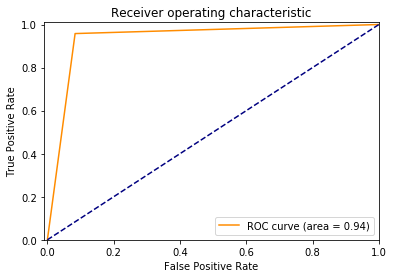

In [21]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")